In [1]:
import pandas as pd
import numpy as np
import datetime
data = pd.read_csv('D:/Datasets/cryptocurrency/4/Minute/Binance_BTCUSDT_minute.csv', header=1, nrows=500000)

In [2]:
data.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1619829300000,2021-05-01 00:35:00,BTC/USDT,57889.05,57962.19,57870.86,57885.99,54.697434,3.167832e+06,1566
1,1619829240000,2021-05-01 00:34:00,BTC/USDT,57900.46,57924.99,57876.01,57889.05,47.171708,2.730887e+06,1417
2,1619829180000,2021-05-01 00:33:00,BTC/USDT,57945.24,57954.14,57900.46,57900.47,57.613057,3.337440e+06,1452
3,1619829120000,2021-05-01 00:32:00,BTC/USDT,57924.69,57958.00,57920.34,57945.24,41.860603,2.425330e+06,1711
4,1619829060000,2021-05-01 00:31:00,BTC/USDT,58029.78,58043.57,57924.44,57924.44,69.892993,4.053425e+06,2065


In [3]:
print("shape : ", data.shape)
data.info()
#data['symbol'].unique()
#data['close'].value_counts()
data.describe()

shape :  (331923, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331923 entries, 0 to 331922
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   unix         331923 non-null  int64  
 1   date         331923 non-null  object 
 2   symbol       331923 non-null  object 
 3   open         331923 non-null  float64
 4   high         331923 non-null  float64
 5   low          331923 non-null  float64
 6   close        331923 non-null  float64
 7   Volume BTC   331923 non-null  float64
 8   Volume USDT  331923 non-null  float64
 9   tradecount   331923 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 25.3+ MB


,unix,open,high,low,close,Volume BTC,Volume USDT,tradecount
count,3.319230e+05,331923.000000,331923.000000,331923.000000,331923.000000,331923.000000,3.319230e+05,331923.000000
mean,1.609830e+12,32465.436936,32491.910582,32438.598410,32465.587088,53.498531,1.782696e+06,1172.044619
std,5.762866e+09,18003.895235,18019.579448,17988.217472,18003.918461,62.388067,2.316149e+06,1001.375103
min,1.599857e+12,10149.690000,10159.490000,10136.820000,10149.690000,0.000000,0.000000e+00,0.000000
25%,1.604836e+12,15375.320000,15383.190000,15367.395000,15375.400000,22.426859,4.900567e+05,580.000000
50%,1.609835e+12,31524.650000,31569.880000,31476.680000,31524.140000,36.270226,1.159841e+06,952.000000
75%,1.614819e+12,50745.745000,50791.700000,50700.000000,50745.945000,61.475383,2.190163e+06,1450.000000
max,1.619829e+12,64800.000000,64854.000000,64685.170000,64800.000000,2285.737736,1.046984e+08,29164.000000


In [4]:
datac = data.copy()
datac = datac.drop('unix', axis=1)
datac = datac.drop('symbol', axis=1)
datac['date'] = pd.to_datetime(datac['date'])
datac.info()
datac.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331923 entries, 0 to 331922
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         331923 non-null  datetime64[ns]
 1   open         331923 non-null  float64       
 2   high         331923 non-null  float64       
 3   low          331923 non-null  float64       
 4   close        331923 non-null  float64       
 5   Volume BTC   331923 non-null  float64       
 6   Volume USDT  331923 non-null  float64       
 7   tradecount   331923 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 20.3 MB


,date,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,2021-05-01 00:35:00,57889.05,57962.19,57870.86,57885.99,54.697434,3.167832e+06,1566
1,2021-05-01 00:34:00,57900.46,57924.99,57876.01,57889.05,47.171708,2.730887e+06,1417
2,2021-05-01 00:33:00,57945.24,57954.14,57900.46,57900.47,57.613057,3.337440e+06,1452
3,2021-05-01 00:32:00,57924.69,57958.00,57920.34,57945.24,41.860603,2.425330e+06,1711
4,2021-05-01 00:31:00,58029.78,58043.57,57924.44,57924.44,69.892993,4.053425e+06,2065


In [5]:
datac = datac.reindex(index=datac.index[::-1]).reset_index()
datac.head()

,index,date,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,331922,2020-09-11 20:40:00,10317.00,10317.01,10314.36,10316.00,32.997684,340398.477553,342
1,331921,2020-09-11 20:41:00,10316.00,10321.09,10316.00,10319.50,16.328427,168497.705251,256
2,331920,2020-09-11 20:42:00,10319.50,10320.31,10318.49,10319.34,12.123487,125108.931436,193
3,331919,2020-09-11 20:43:00,10319.34,10320.14,10318.89,10319.00,13.548103,139806.963489,187
4,331918,2020-09-11 20:44:00,10318.99,10319.72,10316.58,10319.47,14.466964,149266.708094,284


In [6]:
#sort with date
#datac.sort_values(by=['date'], inplace=True, ascending=True)
datac = datac.drop('index', axis=1)
datac.head(10)

,date,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,2020-09-11 20:40:00,10317.00,10317.01,10314.36,10316.00,32.997684,340398.477553,342
1,2020-09-11 20:41:00,10316.00,10321.09,10316.00,10319.50,16.328427,168497.705251,256
2,2020-09-11 20:42:00,10319.50,10320.31,10318.49,10319.34,12.123487,125108.931436,193
3,2020-09-11 20:43:00,10319.34,10320.14,10318.89,10319.00,13.548103,139806.963489,187
4,2020-09-11 20:44:00,10318.99,10319.72,10316.58,10319.47,14.466964,149266.708094,284
5,2020-09-11 20:45:00,10319.46,10323.12,10319.00,10322.50,24.543748,253313.988427,334
6,2020-09-11 20:46:00,10322.49,10322.58,10320.17,10321.16,10.964691,113172.303581,206
7,2020-09-11 20:47:00,10321.15,10322.58,10320.53,10320.77,14.117452,145719.584871,235
8,2020-09-11 20:48:00,10320.77,10321.48,10319.04,10321.39,20.614136,212749.974923,263
9,2020-09-11 20:49:00,10321.39,10321.39,10316.11,10316.77,17.947550,185181.696361,272


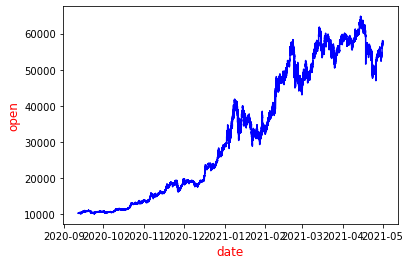

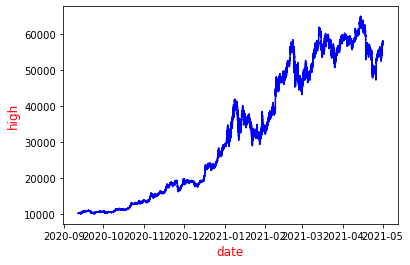

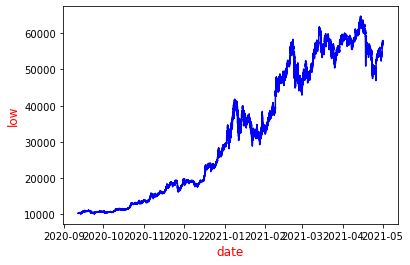

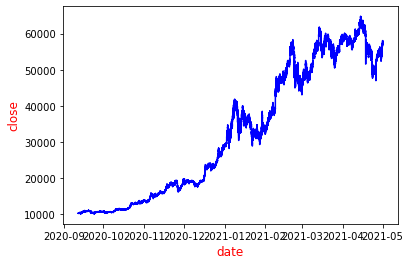

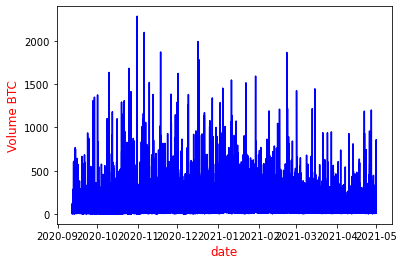

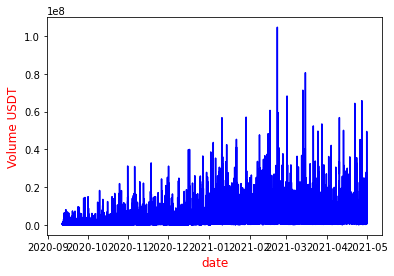

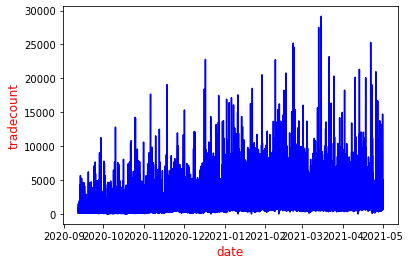

In [7]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
y = ['open','high', 'low', 'close', 'Volume BTC', 'Volume USDT', 'tradecount']
for i in range(len(y)):
    plt.xlabel('date', fontsize=12, color='red')
    plt.ylabel(y[i], fontsize=12, color='red')
    plt.plot_date(date2num(datac['date']), datac[y[i]], 'b')
    plt.show()

<AxesSubplot:xlabel='date', ylabel='close'>

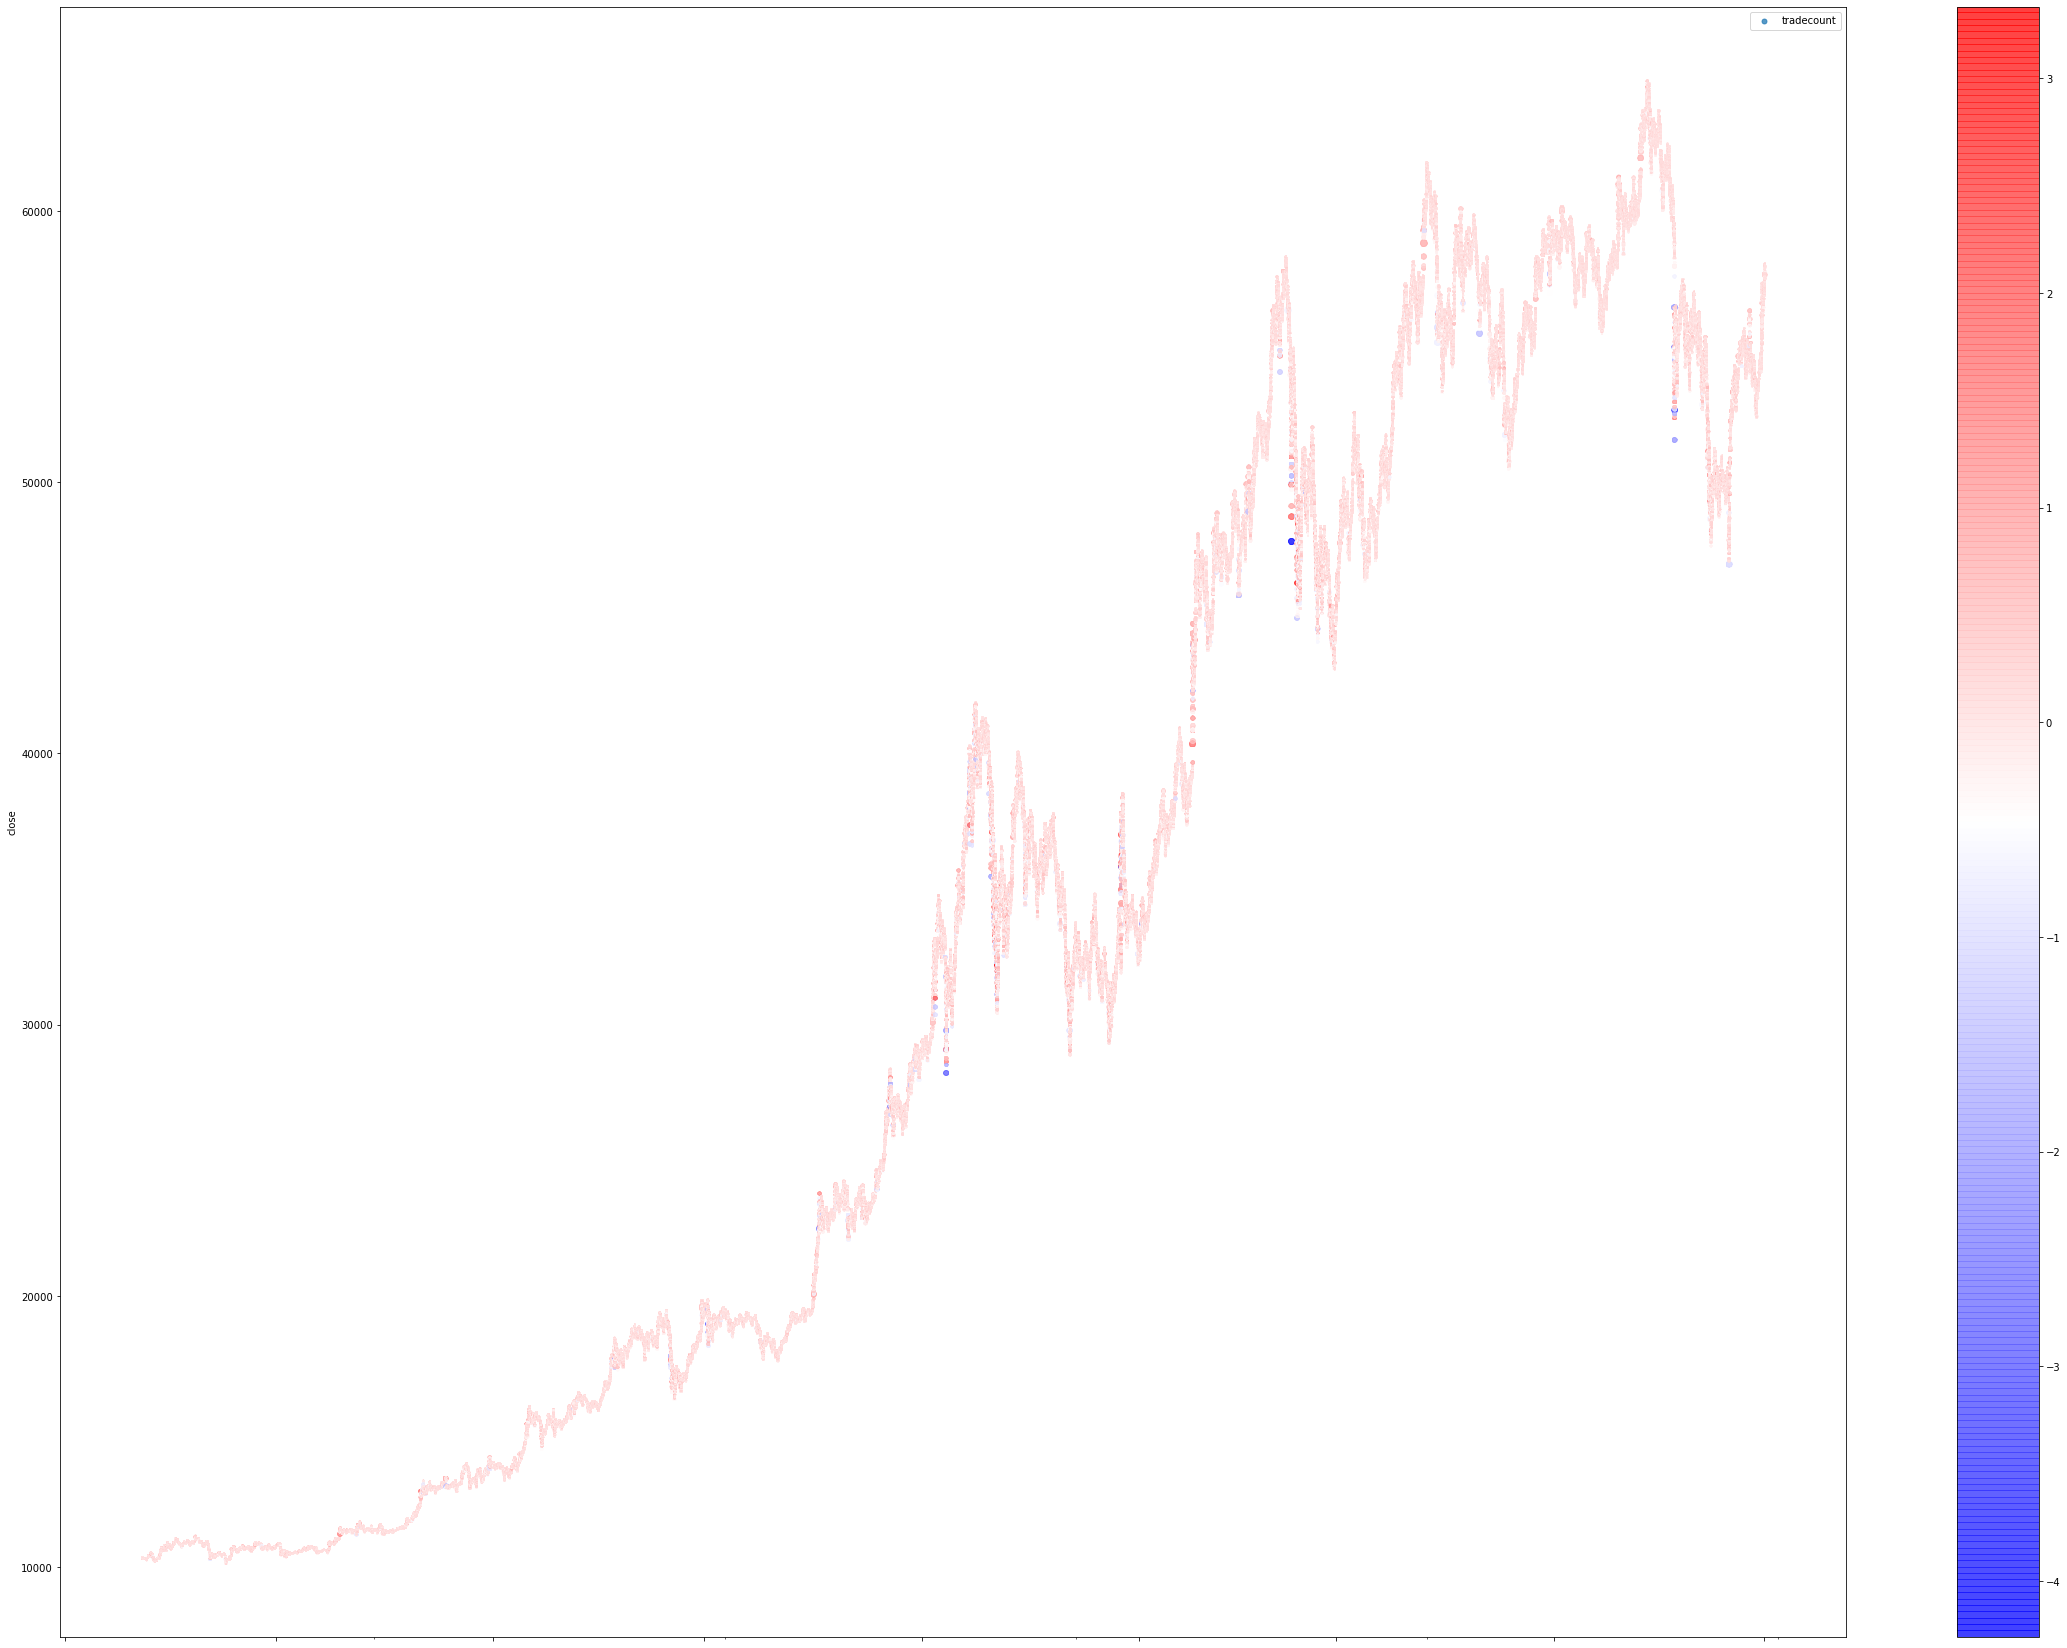

In [8]:
datac.plot(kind="scatter", x='date', y="close",
          s=datac['tradecount']/600, label="tradecount",
          c=100*(datac["close"]-datac["open"])/datac['open'], cmap=plt.get_cmap("bwr"),
          figsize=(40,30), alpha=0.75, snap=True, antialiased=True)

In [9]:
#standard correlation coefficient [-1, 1]
corr_matrix = datac.corr()
corr_matrix['close'].sort_values(ascending=False)

close          1.000000
high           0.999998
low            0.999998
open           0.999996
Volume USDT    0.390742
tradecount     0.356626
Volume BTC     0.040855
Name: close, dtype: float64

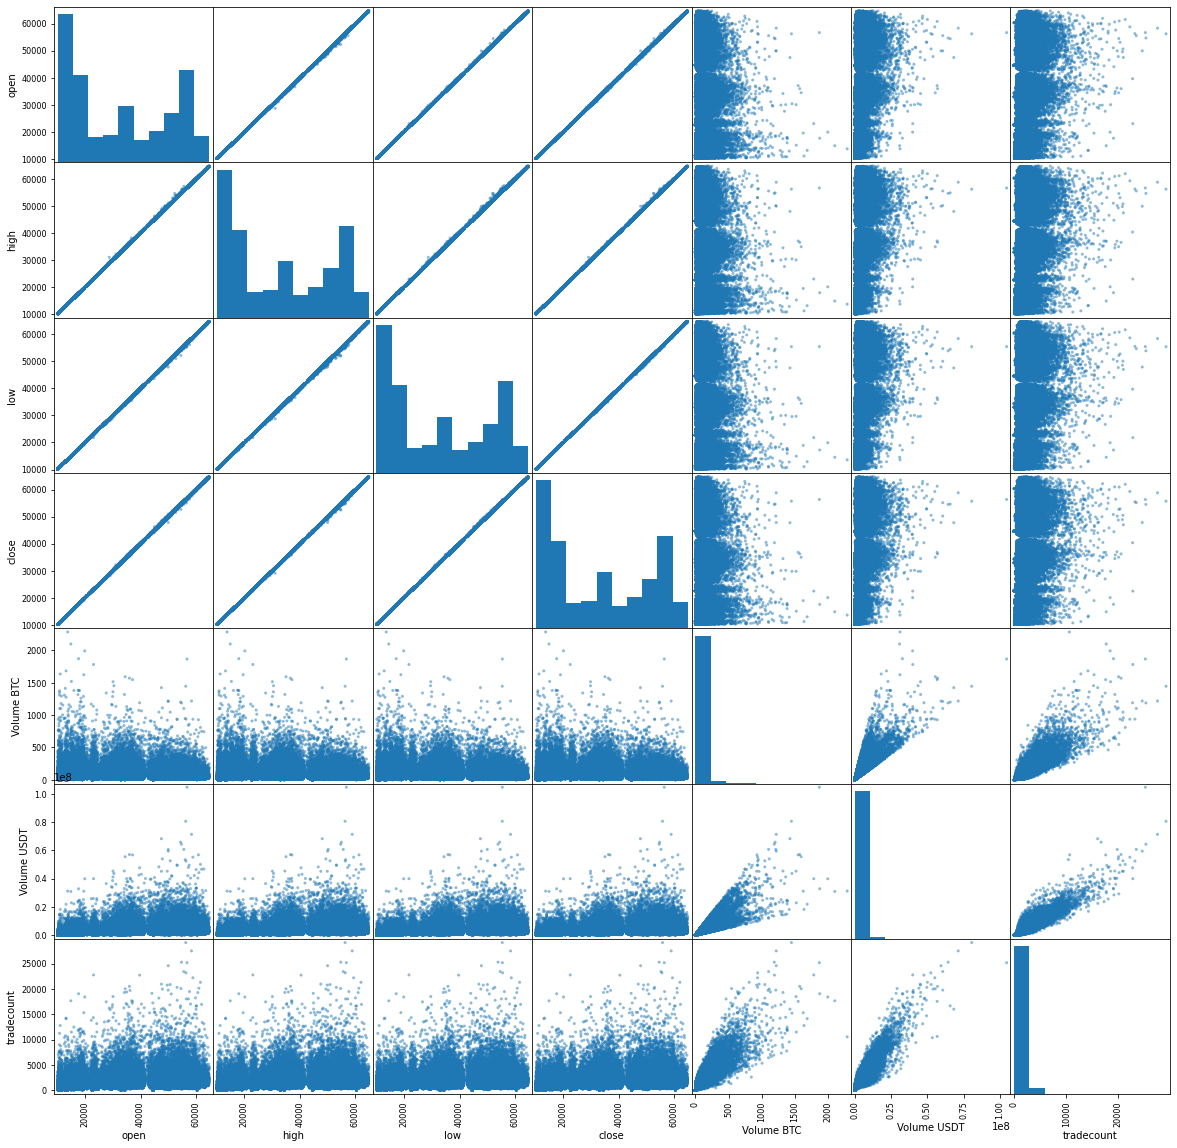

In [10]:
features = ['open','high', 'low', 'close', 'Volume BTC', 'Volume USDT', 'tradecount']
from pandas.plotting import scatter_matrix
scatter_matrix(datac[features], figsize=(20,20))
plt.show()

<AxesSubplot:xlabel='open', ylabel='close'>

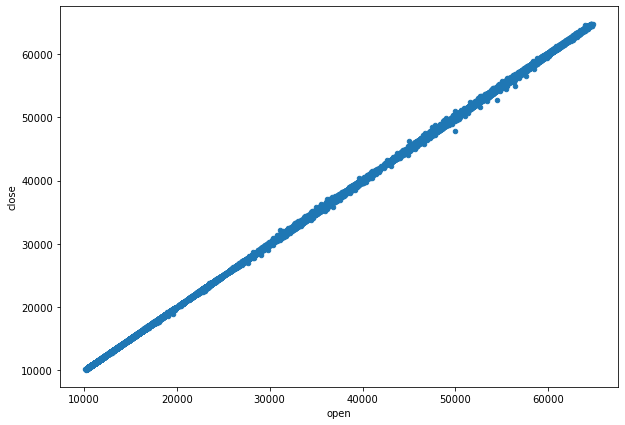

In [11]:
datac.plot(kind="scatter", x="open", y="close", figsize=(10,7))

In [12]:
datac['close-open'] = datac['close'] - datac['open']
datac['Volume BTC_per_tradecount'] = datac['Volume BTC'] / (datac['tradecount']+1)
datac['Volume USDT_per_tradecount'] = datac['Volume USDT'] / (datac['tradecount']+1)
datac['high-open'] = datac['high'] - datac['open']
datac['low-open'] = datac['low'] - datac['open']
datac['mhl-open'] = (datac['high'] + datac['low'])/2 - datac['open']
datac.head(15)

,date,open,high,low,close,Volume BTC,Volume USDT,tradecount,close-open,Volume BTC_per_tradecount,Volume USDT_per_tradecount,high-open,low-open,mhl-open
0,2020-09-11 20:40:00,10317.00,10317.01,10314.36,10316.00,32.997684,340398.477553,342,-1.00,0.096203,992.415386,0.01,-2.64,-1.315
1,2020-09-11 20:41:00,10316.00,10321.09,10316.00,10319.50,16.328427,168497.705251,256,3.50,0.063535,655.633094,5.09,0.00,2.545
2,2020-09-11 20:42:00,10319.50,10320.31,10318.49,10319.34,12.123487,125108.931436,193,-0.16,0.062492,644.891399,0.81,-1.01,-0.100
3,2020-09-11 20:43:00,10319.34,10320.14,10318.89,10319.00,13.548103,139806.963489,187,-0.34,0.072064,743.654061,0.80,-0.45,0.175
4,2020-09-11 20:44:00,10318.99,10319.72,10316.58,10319.47,14.466964,149266.708094,284,0.48,0.050761,523.742835,0.73,-2.41,-0.840
5,2020-09-11 20:45:00,10319.46,10323.12,10319.00,10322.50,24.543748,253313.988427,334,3.04,0.073265,756.161159,3.66,-0.46,1.600
6,2020-09-11 20:46:00,10322.49,10322.58,10320.17,10321.16,10.964691,113172.303581,206,-1.33,0.052970,546.726104,0.09,-2.32,-1.115
7,2020-09-11 20:47:00,10321.15,10322.58,10320.53,10320.77,14.117452,145719.584871,235,-0.38,0.059820,617.455868,1.43,-0.62,0.405
8,2020-09-11 20:48:00,10320.77,10321.48,10319.04,10321.39,20.614136,212749.974923,263,0.62,0.078084,805.871117,0.71,-1.73,-0.510
9,2020-09-11 20:49:00,10321.39,10321.39,10316.11,10316.77,17.947550,185181.696361,272,-4.62,0.065742,678.321232,0.00,-5.28,-2.640


In [13]:
corr_matrix = datac.corr()
corr_matrix['close'].sort_values(ascending=False)

close                         1.000000
high                          0.999998
low                           0.999998
open                          0.999996
Volume USDT_per_tradecount    0.586829
Volume USDT                   0.390742
high-open                     0.372949
tradecount                    0.356626
Volume BTC                    0.040855
close-open                    0.001846
mhl-open                      0.001117
low-open                     -0.360796
Volume BTC_per_tradecount    -0.539832
Name: close, dtype: float64

<AxesSubplot:xlabel='mhl-open', ylabel='close-open'>

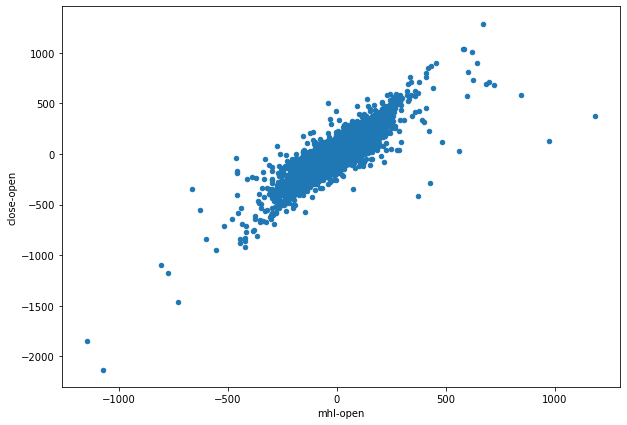

In [14]:
datac.plot(kind="scatter", x="mhl-open", y="close-open", figsize=(10,7))

In [15]:
datac = datac.drop('date', axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(datac.values), columns=datac.columns)
df_num_scaled.head()

df_label_scaled = df_num_scaled['close'].copy()
df_label_scaled = pd.DataFrame(df_label_scaled)
df_num_scaled = df_num_scaled.drop('close', axis=1)

In [16]:
df_num_scaled = df_num_scaled.drop('Volume BTC', axis=1)
df_num_scaled = df_num_scaled.drop('close-open', axis=1)
df_num_scaled = df_num_scaled.drop('mhl-open', axis=1)
df_num_scaled.head()

,open,high,low,Volume USDT,tradecount,Volume BTC_per_tradecount,Volume USDT_per_tradecount,high-open,low-open
0,-1.230204,-1.230602,-1.229931,-0.622714,-0.828906,2.080327,-0.437147,-0.628036,0.557957
1,-1.230260,-1.230376,-1.229840,-0.696933,-0.914788,0.708691,-0.943414,-0.507478,0.618829
2,-1.230065,-1.230419,-1.229702,-0.715666,-0.977702,0.664919,-0.959561,-0.609051,0.595541
3,-1.230074,-1.230428,-1.229679,-0.709320,-0.983693,1.066822,-0.811097,-0.609288,0.608453
4,-1.230094,-1.230452,-1.229808,-0.705236,-0.886826,0.172377,-1.141678,-0.610949,0.563260


In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_num_scaled, df_label_scaled)
bitcoin_predictions = tree_reg.predict(df_num_scaled)
tree_mse = mean_squared_error(df_label_scaled, bitcoin_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.4464714843181922e-17

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_num_scaled, df_label_scaled, scoring="neg_mean_squared_error", cv=10)
trees_rmse_scores = np.sqrt(-scores)

def display_scores(scores, model_name):
    print("============", model_name, "============")
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard devitation:", scores.std())
    print("==================================================")
    
display_scores(trees_rmse_scores, "Desicion Tree Regression")

============ Desicion Tree Regression ============
Scores: [0.00440969 0.01566727 0.02884296 0.00260959 0.13496992 0.00307703
 0.00260736 0.0029004  0.00206905 0.02887836]
Mean: 0.02260316306890919
Standard devitation: 0.03882576868623942
